# Bank Marketing
##    Created by: Paulo Cortez (Univ. Minho) and Sérgio Moro (ISCTE-IUL) @ 2012

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
filepath = "Data/bank.csv"
ds = pd.read_csv(filepath, header=0 ,sep= ";")

In [3]:
ds.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
    ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [5]:
df=pd.get_dummies(ds, drop_first=True)
df.head(5)

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,30,1787,19,79,1,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,33,4789,11,220,1,339,4,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,35,1350,16,185,1,330,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30,1476,3,199,4,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,59,0,5,226,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  4521 non-null   int64
 1   balance              4521 non-null   int64
 2   day                  4521 non-null   int64
 3   duration             4521 non-null   int64
 4   campaign             4521 non-null   int64
 5   pdays                4521 non-null   int64
 6   previous             4521 non-null   int64
 7   job_blue-collar      4521 non-null   uint8
 8   job_entrepreneur     4521 non-null   uint8
 9   job_housemaid        4521 non-null   uint8
 10  job_management       4521 non-null   uint8
 11  job_retired          4521 non-null   uint8
 12  job_self-employed    4521 non-null   uint8
 13  job_services         4521 non-null   uint8
 14  job_student          4521 non-null   uint8
 15  job_technician       4521 non-null   uint8
 16  job_unemployed       452

In [7]:
# function to Get the count of unique values in each column
# More the number of unique value, less value it has in analysis
def getdfcount(df):
    li=ds.columns.to_list()
    # print(li)
    for i in li:
        print(i+'-'+str(ds[i].nunique()))

In [8]:
def drop_(df,columns):
    df.drop(columns=columns,inplace=True,axis=1)
    return df

In [9]:
#Seems duration and balance are not very useful
getdfcount(ds)

age-67
job-12
marital-3
education-4
default-2
balance-2353
housing-2
loan-2
contact-3
day-31
month-12
duration-875
campaign-32
pdays-292
previous-24
poutcome-4
y-2


In [10]:
# df = ds.drop(columns=['balance', 'duration','day'])
df = pd.get_dummies(df, drop_first=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  4521 non-null   int64
 1   balance              4521 non-null   int64
 2   day                  4521 non-null   int64
 3   duration             4521 non-null   int64
 4   campaign             4521 non-null   int64
 5   pdays                4521 non-null   int64
 6   previous             4521 non-null   int64
 7   job_blue-collar      4521 non-null   uint8
 8   job_entrepreneur     4521 non-null   uint8
 9   job_housemaid        4521 non-null   uint8
 10  job_management       4521 non-null   uint8
 11  job_retired          4521 non-null   uint8
 12  job_self-employed    4521 non-null   uint8
 13  job_services         4521 non-null   uint8
 14  job_student          4521 non-null   uint8
 15  job_technician       4521 non-null   uint8
 16  job_unemployed       452

In [12]:
def getcorr(df,colname):
    correlation_matrix=df.corr()
    print(correlation_matrix[colname])

In [13]:
colname = "y_yes"
# drop day
getcorr(df,colname)

age                    0.045092
balance                0.017905
day                   -0.011244
duration               0.401118
campaign              -0.061147
pdays                  0.104087
previous               0.116714
job_blue-collar       -0.068147
job_entrepreneur      -0.015968
job_housemaid          0.004872
job_management         0.032634
job_retired            0.086675
job_self-employed     -0.003827
job_services          -0.024071
job_student            0.047809
job_technician        -0.010154
job_unemployed        -0.007312
job_unknown            0.019886
marital_married       -0.064643
marital_single         0.045815
education_secondary   -0.028744
education_tertiary     0.056649
education_unknown     -0.008870
default_yes            0.001303
housing_yes           -0.104683
loan_yes              -0.070517
contact_telephone      0.025878
contact_unknown       -0.139399
month_aug              0.012084
month_dec              0.069884
month_feb              0.039805
month_ja

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  4521 non-null   int64
 1   balance              4521 non-null   int64
 2   day                  4521 non-null   int64
 3   duration             4521 non-null   int64
 4   campaign             4521 non-null   int64
 5   pdays                4521 non-null   int64
 6   previous             4521 non-null   int64
 7   job_blue-collar      4521 non-null   uint8
 8   job_entrepreneur     4521 non-null   uint8
 9   job_housemaid        4521 non-null   uint8
 10  job_management       4521 non-null   uint8
 11  job_retired          4521 non-null   uint8
 12  job_self-employed    4521 non-null   uint8
 13  job_services         4521 non-null   uint8
 14  job_student          4521 non-null   uint8
 15  job_technician       4521 non-null   uint8
 16  job_unemployed       452

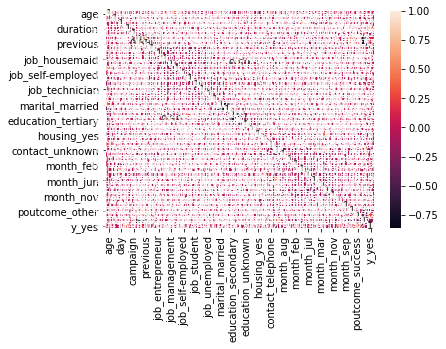

In [15]:
corrMatrix = df.corr()
# print (corrMatrix)
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X=df.drop("y_yes",axis=1)
y=df["y_yes"]

In [18]:
# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=12345)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.7, random_state=42)

In [19]:
from sklearn.neighbors import (NeighborhoodComponentsAnalysis,KNeighborsClassifier)
from sklearn.pipeline import Pipeline
nca = NeighborhoodComponentsAnalysis(random_state=42)
knn = KNeighborsClassifier(n_neighbors=6)
knn_nca_pipe = Pipeline([('nca', nca), ('knn', knn)])
knn_nca_pipe.fit(X_train, y_train)
print(knn_nca_pipe.score(X_test, y_test)*100,'%')

88.15165876777252 %


In [20]:
filepath = "Data/bank-full.csv"
ds = pd.read_csv(filepath, header=0 ,sep= ";")
df=pd.get_dummies(ds, drop_first=True)
df.head(5)
X=df.drop("y_yes",axis=1)
y=df["y_yes"]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.7, random_state=42)
knn_nca_pipe.fit(X_train, y_train)
print(knn_nca_pipe.score(X_test, y_test)*100,'%')

88.51112234580384 %
